In [26]:
import pandas as pd

tf_idf = pd.read_pickle('../article/tf_idf.pkl')

In [27]:
tf_idf_descend = pd.read_pickle('../article/tf_idf_descend.pkl')

TF-IDF를 이용한 keyword 추출1
- TF-IDF 값이 높은 단어 n개를 이용

In [28]:
case_index_df = pd.read_pickle("../seoul_apt_trade_data/case_index_df.pkl")
case_index_df

,case1,case2,case3,case4,case5,case6,case7,case8,uprate,uprate_avg
강남구,"[6, 7, 34, 36, 39, 46, 47, 66, 85, 95, 96, 101...","[5, 14, 22, 26, 35, 37, 38, 42, 55, 64, 65, 72...","[2, 8, 10, 15, 18, 20, 23, 27, 30, 32, 40, 43,...","[12, 24, 44, 49, 53, 70, 76, 90, 103, 113, 124...","[1, 4, 9, 13, 17, 19, 21, 25, 29, 31, 33, 41, ...","[3, 11, 16, 28, 50, 59, 62, 79, 106, 118, 135,...","[2, 5, 6, 7, 8, 10, 14, 15, 18, 20, 22, 23, 26...","[1, 3, 4, 9, 11, 12, 13, 16, 17, 19, 21, 24, 2...","[-0.1317061309257776, 0.0755196433630375, -0.0...",0.000940
강동구,"[7, 27, 30, 34, 36, 40, 46, 65, 68, 73, 74, 83...","[6, 8, 33, 35, 37, 79, 86, 101, 103, 107, 112,...","[4, 9, 13, 15, 20, 23, 28, 31, 38, 41, 47, 55,...","[1, 10, 16, 21, 24, 44, 76, 98, 99, 122, 142, ...","[3, 5, 12, 14, 19, 22, 26, 29, 32, 39, 45, 54,...","[2, 11, 17, 18, 25, 42, 43, 48, 49, 50, 51, 52...","[4, 6, 7, 8, 9, 13, 15, 20, 23, 27, 28, 30, 31...","[1, 2, 3, 5, 10, 11, 12, 14, 16, 17, 18, 19, 2...","[-0.08053120090945218, -0.0677587035592929, -0...",0.000967
강서구,"[10, 25, 28, 36, 114, 115, 116, 119, 121, 147,...","[7, 22, 35, 40, 41, 42, 55, 70, 74, 87, 96, 11...","[2, 4, 8, 11, 15, 19, 23, 26, 29, 32, 37, 43, ...","[5, 12, 17, 20, 48, 52, 59, 63, 72, 90, 110, 1...","[1, 3, 6, 9, 14, 18, 21, 24, 27, 31, 34, 39, 4...","[13, 16, 30, 33, 38, 51, 53, 60, 68, 89, 91, 9...","[2, 4, 7, 8, 10, 11, 15, 19, 22, 23, 25, 26, 2...","[1, 3, 5, 6, 9, 12, 13, 14, 16, 17, 18, 20, 21...","[-0.010000817878349852, 0.01732253050087575, -...",0.001657
강북구,"[28, 35, 43, 46, 49, 58, 117, 118, 121, 134, 1...","[23, 36, 55, 84, 87, 110, 111, 150, 159, 170, ...","[2, 6, 9, 13, 16, 19, 21, 24, 26, 29, 31, 33, ...","[3, 11, 14, 17, 53, 74, 96, 99, 127, 137, 138,...","[1, 5, 8, 12, 15, 18, 20, 22, 25, 27, 30, 32, ...","[4, 7, 10, 60, 69, 79, 82, 89, 100, 103, 108, ...","[2, 6, 9, 13, 16, 19, 21, 23, 24, 26, 28, 29, ...","[1, 3, 4, 5, 7, 8, 10, 11, 12, 14, 15, 17, 18,...","[-0.07770145846522913, 0.20140240074962582, -0...",0.001778
관악구,"[4, 8, 9, 30, 37, 48, 51, 74, 84, 86, 90, 99, ...","[7, 29, 41, 60, 81, 85, 87, 95, 96, 100, 105, ...","[2, 5, 10, 13, 15, 21, 24, 26, 31, 33, 38, 42,...","[16, 19, 22, 34, 44, 63, 79, 115, 123, 126, 14...","[1, 3, 6, 12, 14, 20, 23, 25, 28, 32, 36, 40, ...","[11, 17, 18, 27, 35, 39, 43, 62, 68, 76, 107, ...","[2, 4, 5, 7, 8, 9, 10, 13, 15, 21, 24, 26, 29,...","[1, 3, 6, 11, 12, 14, 16, 17, 18, 19, 20, 22, ...","[-0.0919116003001974, 0.034083617785010206, -0...",0.001401
광진구,"[3, 8, 28, 38, 65, 66, 71, 74, 102, 147, 182, ...","[2, 15, 37, 47, 60, 87, 97, 110, 116, 136, 139...","[4, 6, 9, 11, 16, 18, 20, 23, 26, 29, 31, 33, ...","[12, 24, 49, 53, 80, 91, 107, 108, 126, 129, 1...","[1, 5, 7, 10, 14, 17, 19, 22, 25, 27, 30, 32, ...","[13, 21, 50, 56, 85, 106, 114, 134, 143, 153, ...","[2, 3, 4, 6, 8, 9, 11, 15, 16, 18, 20, 23, 26,...","[1, 5, 7, 10, 12, 13, 14, 17, 19, 21, 22, 24, ...","[-0.0733592452022878, 0.06075941983879273, 0.0...",0.001197
구로구,"[24, 56, 57, 59, 66, 74, 84, 87, 110, 117, 118...","[4, 10, 38, 45, 58, 67, 71, 99, 100, 114, 123,...","[2, 5, 7, 11, 13, 17, 22, 25, 27, 29, 31, 36, ...","[8, 33, 77, 82, 106, 112, 132, 142, 151, 187, ...","[1, 3, 6, 9, 12, 16, 21, 23, 26, 28, 30, 35, 3...","[14, 15, 18, 19, 20, 32, 34, 42, 43, 61, 64, 6...","[2, 4, 5, 7, 10, 11, 13, 17, 22, 24, 25, 27, 2...","[1, 3, 6, 8, 9, 12, 14, 15, 16, 18, 19, 20, 21...","[-0.0774455958603197, 0.06116043226670311, -0....",0.001159
금천구,"[16, 36, 38, 47, 87, 98, 99, 101, 107, 112, 12...","[7, 10, 23, 30, 37, 39, 51, 63, 64, 65, 79, 82...","[2, 8, 11, 13, 17, 19, 24, 26, 28, 31, 33, 40,...","[4, 34, 41, 45, 49, 55, 95, 96, 139, 140, 145,...","[1, 6, 9, 12, 15, 18, 22, 25, 27, 29, 32, 35, ...","[3, 5, 14, 20, 21, 42, 56, 59, 69, 72, 77, 105...","[2, 7, 8, 10, 11, 13, 16, 17, 19, 23, 24, 26, ...","[1, 3, 4, 5, 6, 9, 12, 14, 15, 18, 20, 21, 22,...","[-0.024772337653797938, 0.052399700122267114, ...",0.001708
노원구,"[5, 21, 31, 38, 48, 49, 51, 55, 60, 61, 64, 10...","[4, 17, 22, 26, 29, 30, 37, 

In [29]:
gu_name = ['강남구','강동구','강서구','강북구','관악구','광진구','구로구','금천구',
          '노원구','동대문구','도봉구','동작구','마포구','서대문구','성동구','성북구',
          '서초구','송파구','영등포구','용산구','양천구','은평구','종로구','중구','중랑구']

In [30]:
tf_idf_descend

,0,1,2,3,4,5,6,7,8,9,...,798,799,800,801,802,803,804,805,806,807
0,유보,보호구역,서빙고,이문,당정,옥탑방,역모,공군,길잡이,교남,...,노형욱,김현준,노형욱,노형욱,노형욱,오세훈,김부겸,노형욱,베일리,감시관
1,미성년자,군사,적정,휘경,환수,독창,정태수,롯데월드,표준지,풍산,...,오세훈,오세훈,홍남기,김현준,김현준,특공,홍남기,혁신안,노형욱,김부겸
2,이명박,생애,투기지역,초과분,하한선,당가,마상,생애,공시지가,건축비,...,홍남기,공시,우륵,크레스트,홍남기,혁신안,중간,베일리,홍남기,베일리
3,합산,부재지주,사범,환수,디즈니,쌍둥이,쿠폰,층수,국방,이주성,...,김현준,선바위,신암,양배추,좌원,폴란드,그래비티,덕천,해체,안전벨트
4,응시,즉흥,묘,고향,가산점,철거민,연습,연합체,부재지주,민락,...,吳,허가제,분해,文,김부겸,노형욱,수사,프린팅,임금제,文
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48915,역초,역초,역초,역초,역초,역초,역초,역초,역초,역초,...,대목장,수증,메신저,안신애,홍게,시루떡,타블로,수증,전결,서승일
48916,민달팽이,민달팽이,민달팽이,민달팽이,민달팽이,민달팽이,민달팽이,민달팽이,민달팽이,민달팽이,...,신응수,전결,관용,홍순상,임창욱,이정문,격동,전결,홍게,田園
48917,신규대,신규대,신규대,신규대,신규대,신규대,신규대,신규대,신규대,신규대,...,향적산,홍게,탁방,봉급쟁이,안신애,침탈,뉴스쇼,홍게,임창욱,제자리걸음
48918,생명나무,생명나무,생명나무,생명나무,생명나무,생명나무,생명나무,생명나무,생명나무,생명나무,...,년하,임창욱,위수,법원읍,홍순상,수증,이경창,임창욱,안신애,형연


In [221]:
from collections import Counter

word_extract_dict = {}

for gu in gu_name:
    gu_dict = {}
    for i in range(1,9):
        word_list = []
        case = f'case{i}'
        index_list = case_index_df.loc[gu,case]
        for w in index_list:
            word_list += list(tf_idf_descend.iloc[:50,w])
        gu_dict[case] = word_list
    word_extract_dict[gu] = gu_dict

In [222]:
word_extract_df = pd.DataFrame(word_extract_dict)

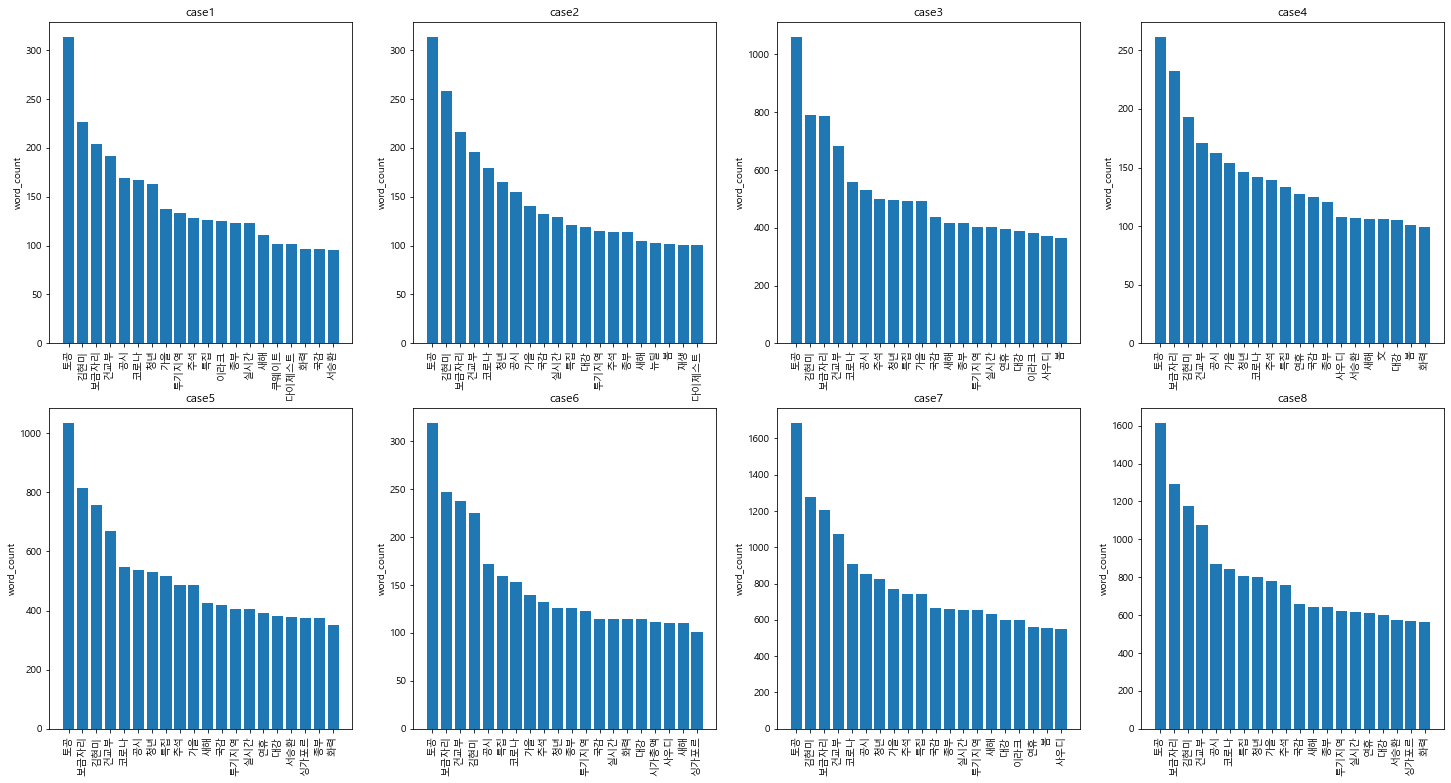

In [223]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

plt.rcParams["figure.figsize"] = (25,13)

word_dict = {}

for i in range(1,9):
    case = f'case{i}'
    wc = Counter(word_extract_df.loc[case,:].sum())
    wc_s = pd.Series(wc)
    wc_s = wc_s.sort_values(ascending = False)[:20]
    
    word_dict[case] = wc_s
    
    plt.subplot(2,4,i)
    plt.ylabel('word_count')
    plt.title(case)
    plt.bar(wc_s.index,wc_s)
    plt.xticks(rotation=90)
plt.show()

In [151]:
from article_searcher import search_article

case_article = {}
for i in range(1,9):
    case = f'case{i}'
    article_sum = 0
    for gu in gu_name:
        index_list = list(case_index_df.loc[gu,case])
        article_sum += len(search_article('',0,index_list))
    case_article[case] = article_sum

In [152]:
case_article

{'case1': 2430986,
 'case2': 2368847,
 'case3': 8517921,
 'case4': 2303898,
 'case5': 8514303,
 'case6': 2438620,
 'case7': 13332643,
 'case8': 13295107}

In [224]:
w_all = []
for w_list in word_dict.values():
     w_all += list(w_list.index)
w_all = list(set(w_all))
w_all

['건교부',
 '이라크',
 '청년',
 '투기지역',
 '코로나',
 '서승환',
 '봄',
 '쿠웨이트',
 '새해',
 '보금자리',
 '특집',
 '화력',
 '종부',
 '다이제스트',
 '싱가포르',
 '가을',
 '대강',
 '추석',
 '재생',
 '김현미',
 '국감',
 '文',
 '뉴딜',
 '시가총액',
 '토공',
 '공시',
 '연휴',
 '사우디',
 '실시간']

In [225]:
word_dict = pd.DataFrame(word_dict)

In [226]:
word_dict = word_dict.fillna(0)
word_dict

,case1,case2,case3,case4,case5,case6,case7,case8
文,0.0,0.0,0.0,106.0,0.0,0.0,0.0,0.0
가을,137.0,141.0,491.0,154.0,487.0,140.0,769.0,781.0
건교부,192.0,196.0,684.0,171.0,669.0,238.0,1072.0,1078.0
공시,169.0,155.0,531.0,162.0,536.0,172.0,855.0,870.0
국감,97.0,132.0,436.0,125.0,420.0,115.0,665.0,660.0
김현미,226.0,258.0,792.0,193.0,756.0,225.0,1276.0,1174.0
뉴딜,0.0,103.0,0.0,0.0,0.0,0.0,0.0,0.0
다이제스트,102.0,101.0,0.0,0.0,0.0,0.0,0.0,0.0
대강,0.0,119.0,390.0,105.0,382.0,114.0,599.0,601.0
보금자리,204.0,216.0,787.0,232.0,814.0,247.0,1207.0,1293.0


In [227]:
for i in range(1,9):
    case = f'case{i}'
    word_dict[case] = word_dict[case] * (case_article['case8']/case_article[case])

In [228]:
word_dict

,case1,case2,case3,case4,case5,case6,case7,case8
文,0.000000,0.000000,0.000000,611.694329,0.000000,0.000000,0.000000,0.0
가을,749.255512,791.359715,766.372163,888.687988,760.451808,763.265691,766.834999,781.0
건교부,1050.051520,1100.046129,1067.614173,986.789909,1044.645297,1297.551675,1068.981949,1078.0
공시,924.264098,869.934439,828.805740,934.853598,836.965439,937.726421,852.592879,870.0
국감,530.494778,740.847393,680.525994,721.337653,655.831128,626.968246,663.127795,660.0
김현미,1235.998143,1448.019904,1236.184832,1113.745336,1180.496030,1226.677004,1272.407619,1174.0
뉴딜,0.000000,578.085466,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
다이제스트,557.839870,566.860505,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
대강,0.000000,667.885150,608.727380,605.923628,596.494026,621.516349,597.313608,601.0
보금자리,1115.679740,1212.295734,1228.380635,1338.802683,1271.063186,1346.618755,1203.601878,1293.0


In [229]:
non_zero_list = []
for i in word_dict.index:
    non_zero = 0
    for val in word_dict.loc[i,:]:
        if val != 0:
            non_zero += 1
    non_zero_list.append(non_zero)

In [230]:
word_dict['non_zero'] = non_zero_list

In [240]:
word_dict[word_dict['non_zero'] == 8]

,case1,case2,case3,case4,case5,case6,case7,case8,non_zero
가을,749.255512,791.359715,766.372163,888.687988,760.451808,763.265691,766.834999,781.0,8
건교부,1050.051520,1100.046129,1067.614173,986.789909,1044.645297,1297.551675,1068.981949,1078.0,8
공시,924.264098,869.934439,828.805740,934.853598,836.965439,937.726421,852.592879,870.0,8
국감,530.494778,740.847393,680.525994,721.337653,655.831128,626.968246,663.127795,660.0,8
김현미,1235.998143,1448.019904,1236.184832,1113.745336,1180.496030,1226.677004,1272.407619,1174.0,8
보금자리,1115.679740,1212.295734,1228.380635,1338.802683,1271.063186,1346.618755,1203.601878,1293.0,8
새해,607.061035,589.310426,650.870044,611.694329,665.200144,599.708757,631.217886,642.0,8
종부,672.689255,639.822748,647.748365,698.254848,587.125010,686.939122,657.144687,641.0,8
청년,891.449988,926.059241,772.615520,842.522378,827.596423,686.939122,820.682970,802.0,8
추석,700.034347,639.822748,780.419717,802.127470,760.451808,719.650509,739.911013,758.0,8
